In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(1001)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Step-1 Loading the necessary Libraries and Dataset


## Step-1.1 Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter('ignore')
%matplotlib inline


## Step-1.2 Loading Train and Test Datasets

In [3]:
train_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

# Step-2 Exploratory Data Analysis & Preprocessing

## Step-2.1 Basic Exploratory Data Analysis (EDA)

In [4]:
# Train and Test dataset column basic information
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

###  Observations from Basic EDA on train & test dataset
* There are total 16 columns including Target column in dataset
* Target column is in yes/no form which is object type
* Total 6 columns are integer type
  {age, balance, duration, campaign, pdays, previous}
* Total 9 columns are object type {last contact date, job, marital, education, default, housing, loan,contact, poutcome}
  

In [5]:
# Descriptive statistics for numerical columns
print("-------------Train Dataset Description-------------")
print(train_df.describe())
print("-------------Test Dataset Description-------------")
print(test_df.describe())

-------------Train Dataset Description-------------
                age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000   
50%       40.000000     549.000000    197.000000      2.000000     -1.000000   
75%       50.000000    2030.000000    380.000000      4.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  39211.000000  
mean      11.826171  
std       44.140259  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  
-------------Test Dataset Des

### Observation from description of Numerical Columns in train and test datasets
* All Numerical columns have same rows as dataset's total rows in both train(39211) and test(10000)
* All the values {mean, standard deviation, minimum value, maximum value, 25% quartile, 50% quartile, 75% quartile } have almost same values in test and train dataset which implies that both datasets follow same distribution.
* Age has approximately 42 mean value with 18 as minimum value and 95 as maximum value
* Balance has approximately 5441 mean value with -8019 as minimum value and 102127 as maximum value in train dataset but in test dataset minimum value is different which is -3372
* Duration has approximately 438 mean value with 0 as minimum value and 4919 as maximum value
* Campaign has approximately 5 mean value with 1 as minimum value and 63 as maximum value
* Pdays has approximately 72 mean value with -1 as minimum value and 871 as maximum value
* Previous has approximately 12 mean value with 0 as minimum value and 275 as maximum value  

In [6]:
# Descriptive statistics for categorical columns
print(train_df.describe(include='object'))

       last contact date          job  marital  education default housing  \
count              39211        38982    39211      37744   39211   39211   
unique              1013           11        3          3       2       2   
top           2009-05-15  blue-collar  married  secondary      no     yes   
freq                 313         7776    22691      19584   36954   21657   

         loan   contact poutcome target  
count   39211     28875     9760  39211  
unique      2         2        3      2  
top        no  cellular  failure     no  
freq    31820     25030     4949  33384  


### Observation from Description of Categorical Columns in train and test datasets
* Job, Education, Contact, Poutcome columns has null values
* Default, housing, loan, contact and target columns have 2 unique values
* Marital, Education, Poutcome columns has 3 unique values
* Job column has 11 unique values
* last contact date should be converted to datetime type and treat it differently
* Job has blue-collar as most frequent value with frequency of 7776 out of 38982 rows (approx 20%)
* Marital has married as most frequent value with frequency of 22691 out of 39211 rows (approx 58%)
* Education has secondary as most frequent value with frequency of 19584 out of 37744 rows (approx 52%)
* Default has no as most frequent value with frequency of 36954 out of 39211 rows (approx 94%)
* Housing has yes as most frequent value with frequency of 21567 out of 39211 rows (approx 55%)
* Loan has no as most frequent value with frequency of 31820 out of 39211 rows (approx 81%)
* Contact has cellular as most frequent value with frequency of 25030 out of 28875 rows (approx 87%)
* Poutcome has failure as most frequent value with frequency of 4949 out of 9760 rows (approx 51%)
* Target has no as most frequent value with frequency of 33384 out of 39211 rows (approx 85%)

### Step-2.1.1 Creation of X_train and y_train from train_df and X_test from test_df
* considering Target column as dependent column and other columns as independent columns and based on this, seperating X_train and y_train where X_train is all Independent features and y_train will be target dependent variable.
* With the same consideration, creating X_test from test_df

In [7]:
print(f"Train dataset shape : {train_df.shape}")
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.copy()

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")


Train dataset shape : (39211, 16)
X_train shape : (39211, 15)
y_train shape : (39211,)
X_test shape : (10000, 15)


* Finding all the columns which has more than 1 missing values for handling of null values in the columns in X_train and X_test

In [8]:
X_train_missing_values = X_train.isnull().sum()
X_test_missing_values = X_test.isnull().sum()

#  columns with missing values
print('-------------------Train dataset Missing values-------------------')
print(X_train_missing_values[X_train_missing_values > 0])
print('-------------------Test dataset Missing values-------------------')
print(X_test_missing_values[X_test_missing_values > 0])

-------------------Train dataset Missing values-------------------
job            229
education     1467
contact      10336
poutcome     29451
dtype: int64
-------------------Test dataset Missing values-------------------
job            59
education     390
contact      2684
poutcome     7508
dtype: int64


### Step-2.1.2 Distribution of the Target variable
* This Visualisation is for understanding the distribution of the target variable.

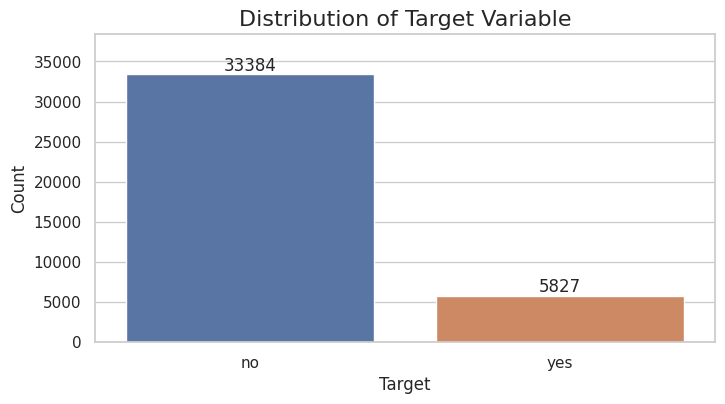

In [9]:
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

ax = sns.countplot(x='target', data=train_df)
target_counts = train_df['target'].value_counts()
max_count = target_counts.max()
plt.ylim(0, max_count * 1.15) 

ax.text(0, target_counts[0], str(target_counts[0]), ha='center', va='bottom')
ax.text(1, target_counts[1], str(target_counts[1]), ha='center', va='bottom')


plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### Observations from count plot of target variable
* Class Imbalance is there in both the values of Target column
* Target column has approx 85% No and approx 15% yes  

### Step-2.1.3 Conversion of the Target variable from categorical variable to Numerical Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)

## Step-2.2 Handling Missing Values in Train & Test Dataset



### Step-2.2.1 Visualization of Null values in Train & Test dataset

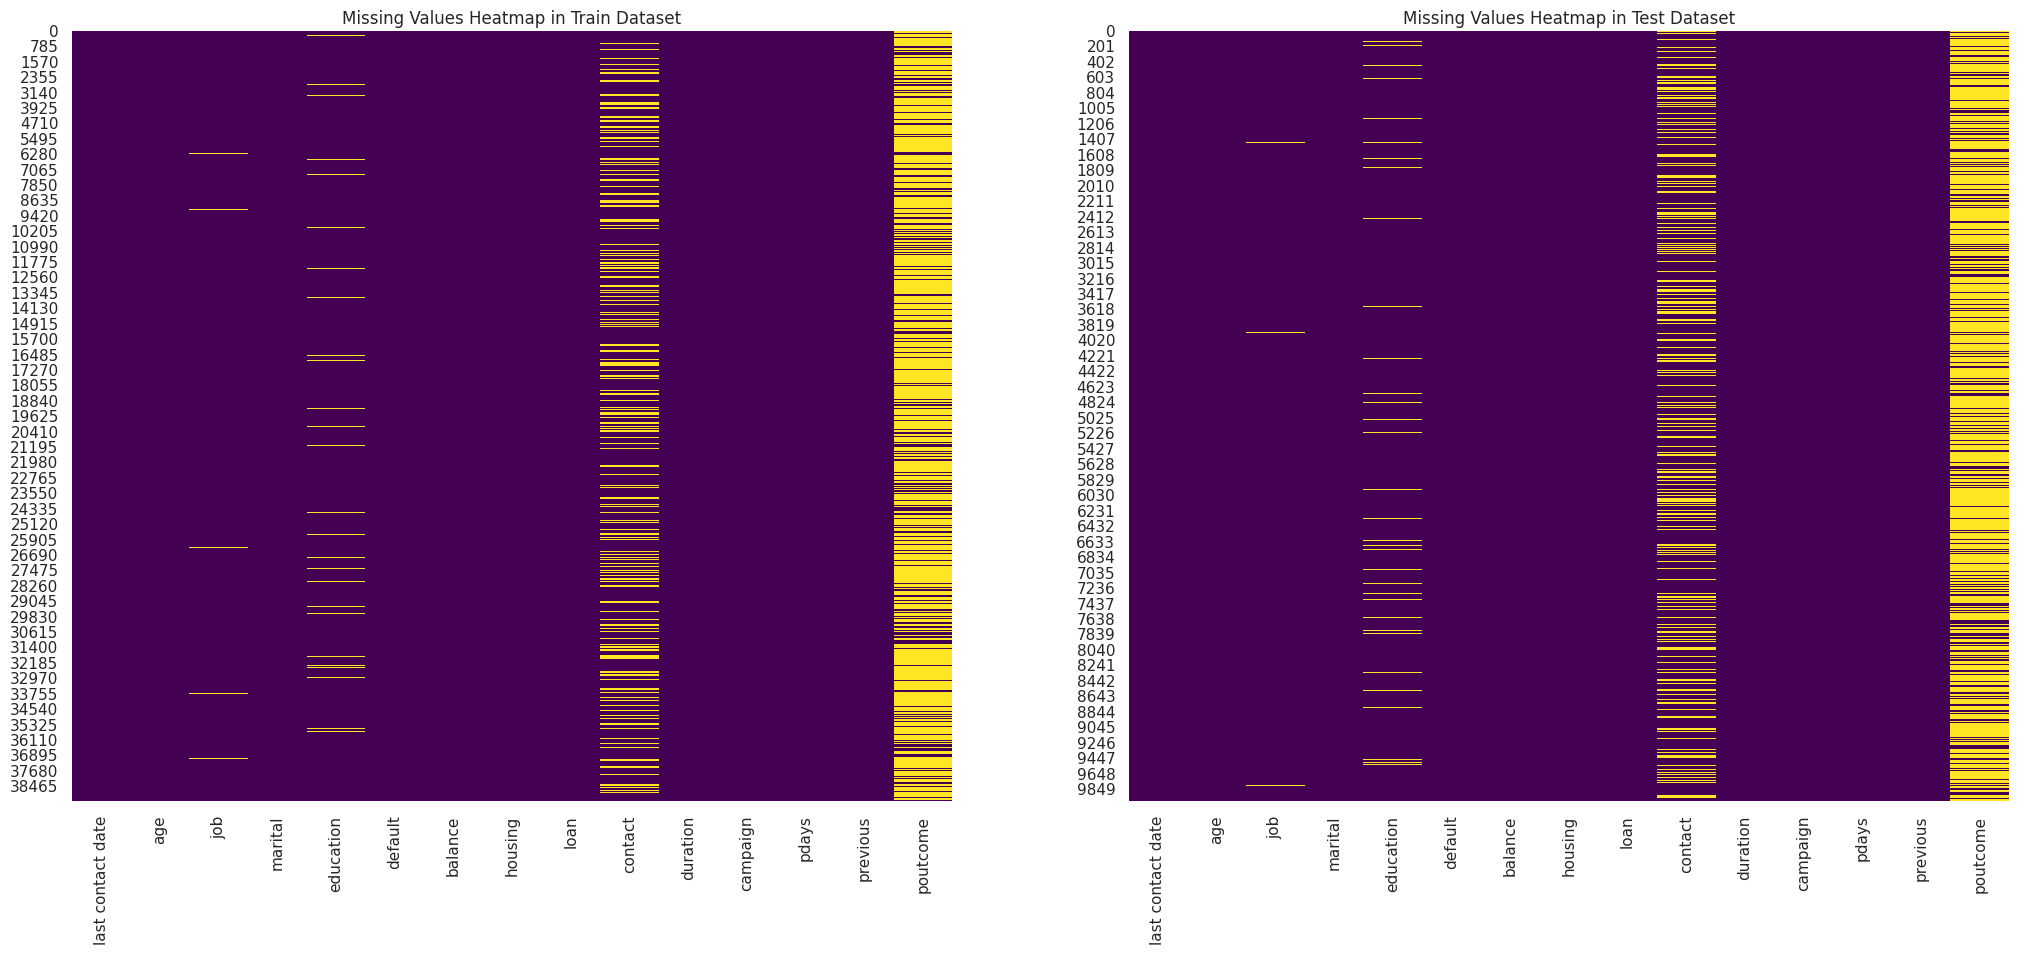

In [11]:
# This figure is with two subplots one is for train data and another is for test data
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Train dataset missing values heatmap
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title("Missing Values Heatmap in Train Dataset")

# Test dataset missing values heatmap
sns.heatmap(X_test.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title("Missing Values Heatmap in Test Dataset")

plt.show()

### Step-2.2.2 Percentage Null values in Train and Test Dataset

In [12]:
# Columns containing Null Values
columns = ['job', 'education', 'contact', 'poutcome']

# Train Dataset Null Percentage
print("------------Train Dataset------------")
for col in columns:
    per_null_train = round((X_train[col].isnull().sum() / len(X_train)) * 100, 2)
    print(f"Percentage null in {col} column of train data: {per_null_train}% with count {X_train[col].isnull().sum()} out of {len(X_train)}")

# Test Dataset Null Percentage
print("------------Test Dataset------------")
for col in columns:
    per_null_test = round((X_test[col].isnull().sum() / len(X_test)) * 100, 2)
    print(f"Percentage null in {col} column of test data: {per_null_test}% with count {X_test[col].isnull().sum()} out of {len(X_test)}")


------------Train Dataset------------
Percentage null in job column of train data: 0.58% with count 229 out of 39211
Percentage null in education column of train data: 3.74% with count 1467 out of 39211
Percentage null in contact column of train data: 26.36% with count 10336 out of 39211
Percentage null in poutcome column of train data: 75.11% with count 29451 out of 39211
------------Test Dataset------------
Percentage null in job column of test data: 0.59% with count 59 out of 10000
Percentage null in education column of test data: 3.9% with count 390 out of 10000
Percentage null in contact column of test data: 26.84% with count 2684 out of 10000
Percentage null in poutcome column of test data: 75.08% with count 7508 out of 10000


### Observations from Test and Train dataset null values visualization and Percentage calculation
* Both Train and Test dataset has same columns which has null values which are {job, education, contact, poutcome}
* Both Train and Test dataset follows same distribution in terms of null values
* Percentage Null in job column is 0.59% same in both
* Percentage Null in education column is 3.9% same in both
* Percentage Null in contact column is 26.8% same in both
* Percentage Null in poutcome column is 75% same in both


### Step-2.2.3 Check for Duplicate rows in the Train and Test Dataset 

In [13]:
duplicate_rows_train = X_train[X_train.duplicated()]
duplicate_rows_test = X_test[X_test.duplicated()]

print(f"Number of duplicate rows in train dataset: {duplicate_rows_train.shape[0]}")
print(f"Number of duplicate rows in test dataset: {duplicate_rows_test.shape[0]}")

Number of duplicate rows in train dataset: 0
Number of duplicate rows in test dataset: 0


## Step-2.3 Preprocessing of Missing Values in Train and Test dataset

### Step-2.3.1 Dropping poutcome column
* As poutcome column has more than 75% values as Null values, this column can be dropped.

In [14]:
# X_train.drop('poutcome', axis=1, inplace=True)
# X_test.drop('poutcome', axis=1, inplace=True)

### Step-2.3.2 Conversion of last contact date column in datetime object 
* Conversion of last contact date column into datetime object and extracting day, year, month and date of week from that for both test and train dataset

In [15]:
X_train['last contact date'] = pd.to_datetime(X_train['last contact date'], errors='ignore')
X_test['last contact date'] = pd.to_datetime(X_test['last contact date'], errors='ignore')

def extract_date_features(df):
    df['year'] = df['last contact date'].dt.year
    df['month'] = df['last contact date'].dt.month
    df['day'] = df['last contact date'].dt.day
    df['day_of_week'] = df['last contact date'].dt.dayofweek
    return df

X_train = extract_date_features(X_train)
X_test = extract_date_features(X_test)

X_train.drop('last contact date', axis=1, inplace=True)
X_test.drop('last contact date', axis=1, inplace=True)


### Step-2.3.3 Imputation of all columns which has Null Values
* All the columns which has missing values are categorical columns so for imputation for categorical columns, we can use SimpleImputer with Most frequent strategy.
* Simple Imputation :-Imputation of job, education, contact, poutcome columns using fost frequent value in the column.
* KNN Imputation :- Imputation of job, education, contact, poutcome columns using 5 nearest neighbours.

#### Step-2.3.3.1 Imputation in Train Dataset
#### Simple Imputation in Train Dataset using most frequent value 

In [16]:
from sklearn.impute import SimpleImputer,KNNImputer 

X_train_categorical_cols=list(X_train.select_dtypes(include="object").columns)
X_train_numerical_cols=list(X_train.select_dtypes(include=["float", "int"]).columns)
print(X_train_categorical_cols, X_train_numerical_cols)

# categorical_imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# for categorical_col in X_train_categorical_cols:
#   X_train[categorical_col]=categorical_imputer.fit_transform(X_train[[categorical_col]]).reshape(-1)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'] ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'year', 'month', 'day', 'day_of_week']


#### KNNImputation using k=5

In [17]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical columns to numerical using LabelEncoder
label_encoders = {}
X_train_encoded = X_train.copy() 

for col in X_train_categorical_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col].astype(str))  
    label_encoders[col] = le

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5) 
X_train_imputed = knn_imputer.fit_transform(X_train_encoded)

X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Decode categorical columns back to original labels
for col in X_train_categorical_cols:
    le = label_encoders[col]
    X_train_imputed_df[col] = X_train_imputed_df[col].round().astype(int) 
    X_train_imputed_df[col] = le.inverse_transform(X_train_imputed_df[col])

X_train.update(X_train_imputed_df)

In [18]:
X_train.head()

age           job  marital  education default  balance housing loan  \
0   26   blue-collar  married  secondary      no      647     yes   no   
1   52    technician  married  secondary      no      553     yes   no   
2   44   blue-collar  married  secondary      no     1397      no   no   
3   33        admin.  married  secondary      no      394     yes   no   
4   31  entrepreneur   single   tertiary      no      137      no   no   

     contact  duration  campaign  pdays  previous poutcome  year  month  day  \
0   cellular       357         2    331         1    other  2009      4   17   
1  telephone       160         1     -1         0      nan  2009     10   11   
2   cellular       326         1     -1         0      nan  2010     11   20   
3  telephone       104         3     -1         0      nan  2009      9    1   
4   cellular       445         2     -1         0      nan  2008      1   29   

   day_of_week  
0            4  
1            6  
2            5  
3            1  
4            1

#### Step-2.3.3.2 Imputation in Test Dataset

In [19]:
X_test_categorical_cols=list(X_test.select_dtypes(include="object").columns)
X_test_numerical_cols=list(X_test.select_dtypes(include=["float", "int"]).columns)
print(X_test_categorical_cols, X_test_numerical_cols)


# # categorical_imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'] ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'year', 'month', 'day', 'day_of_week']


In [20]:
X_test_encoded = X_test.copy()
for col in X_test_categorical_cols:
    le = label_encoders[col] 
    X_test_encoded[col] = le.transform(X_test[col].astype(str)) 
    
# Apply KNN Imputer to X_test
X_test_imputed = knn_imputer.transform(X_test_encoded) 
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Decode categorical columns in X_test back to original labels
for col in X_test_categorical_cols:
    le = label_encoders[col]
    X_test_imputed_df[col] = X_test_imputed_df[col].round().astype(int)  
    X_test_imputed_df[col] = le.inverse_transform(X_test_imputed_df[col]) 

# Update X_test with the imputed and decoded values
X_test.update(X_test_imputed_df)

#### Step-2.3.2.3 Checking for the Null Values after Imputation in Train and Test Dataset

In [21]:
X_train_missing_values = X_train.isnull().sum()
X_test_missing_values = X_test.isnull().sum()

#  columns with missing values
print('-------------------Train dataset Missing values-------------------')
print(X_train_missing_values[X_train_missing_values > 0])
print('-------------------Test dataset Missing values-------------------')
print(X_test_missing_values[X_test_missing_values > 0])

-------------------Train dataset Missing values-------------------
Series([], dtype: int64)
-------------------Test dataset Missing values-------------------
Series([], dtype: int64)


* From this Imputation Step-2.3 we have handled all the missing values in the dataset and test dataset.

## Step-2.4 Visualization of all Univariate and Multivariate Distributions

In [22]:
numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns, categorical_columns

(Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'year',
        'month', 'day', 'day_of_week'],
       dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'poutcome'],
       dtype='object'))

### Step-2.4.1 Histogram of Numerical Columns
* For understanding of distribution of Numerical Columns using histogram plots.

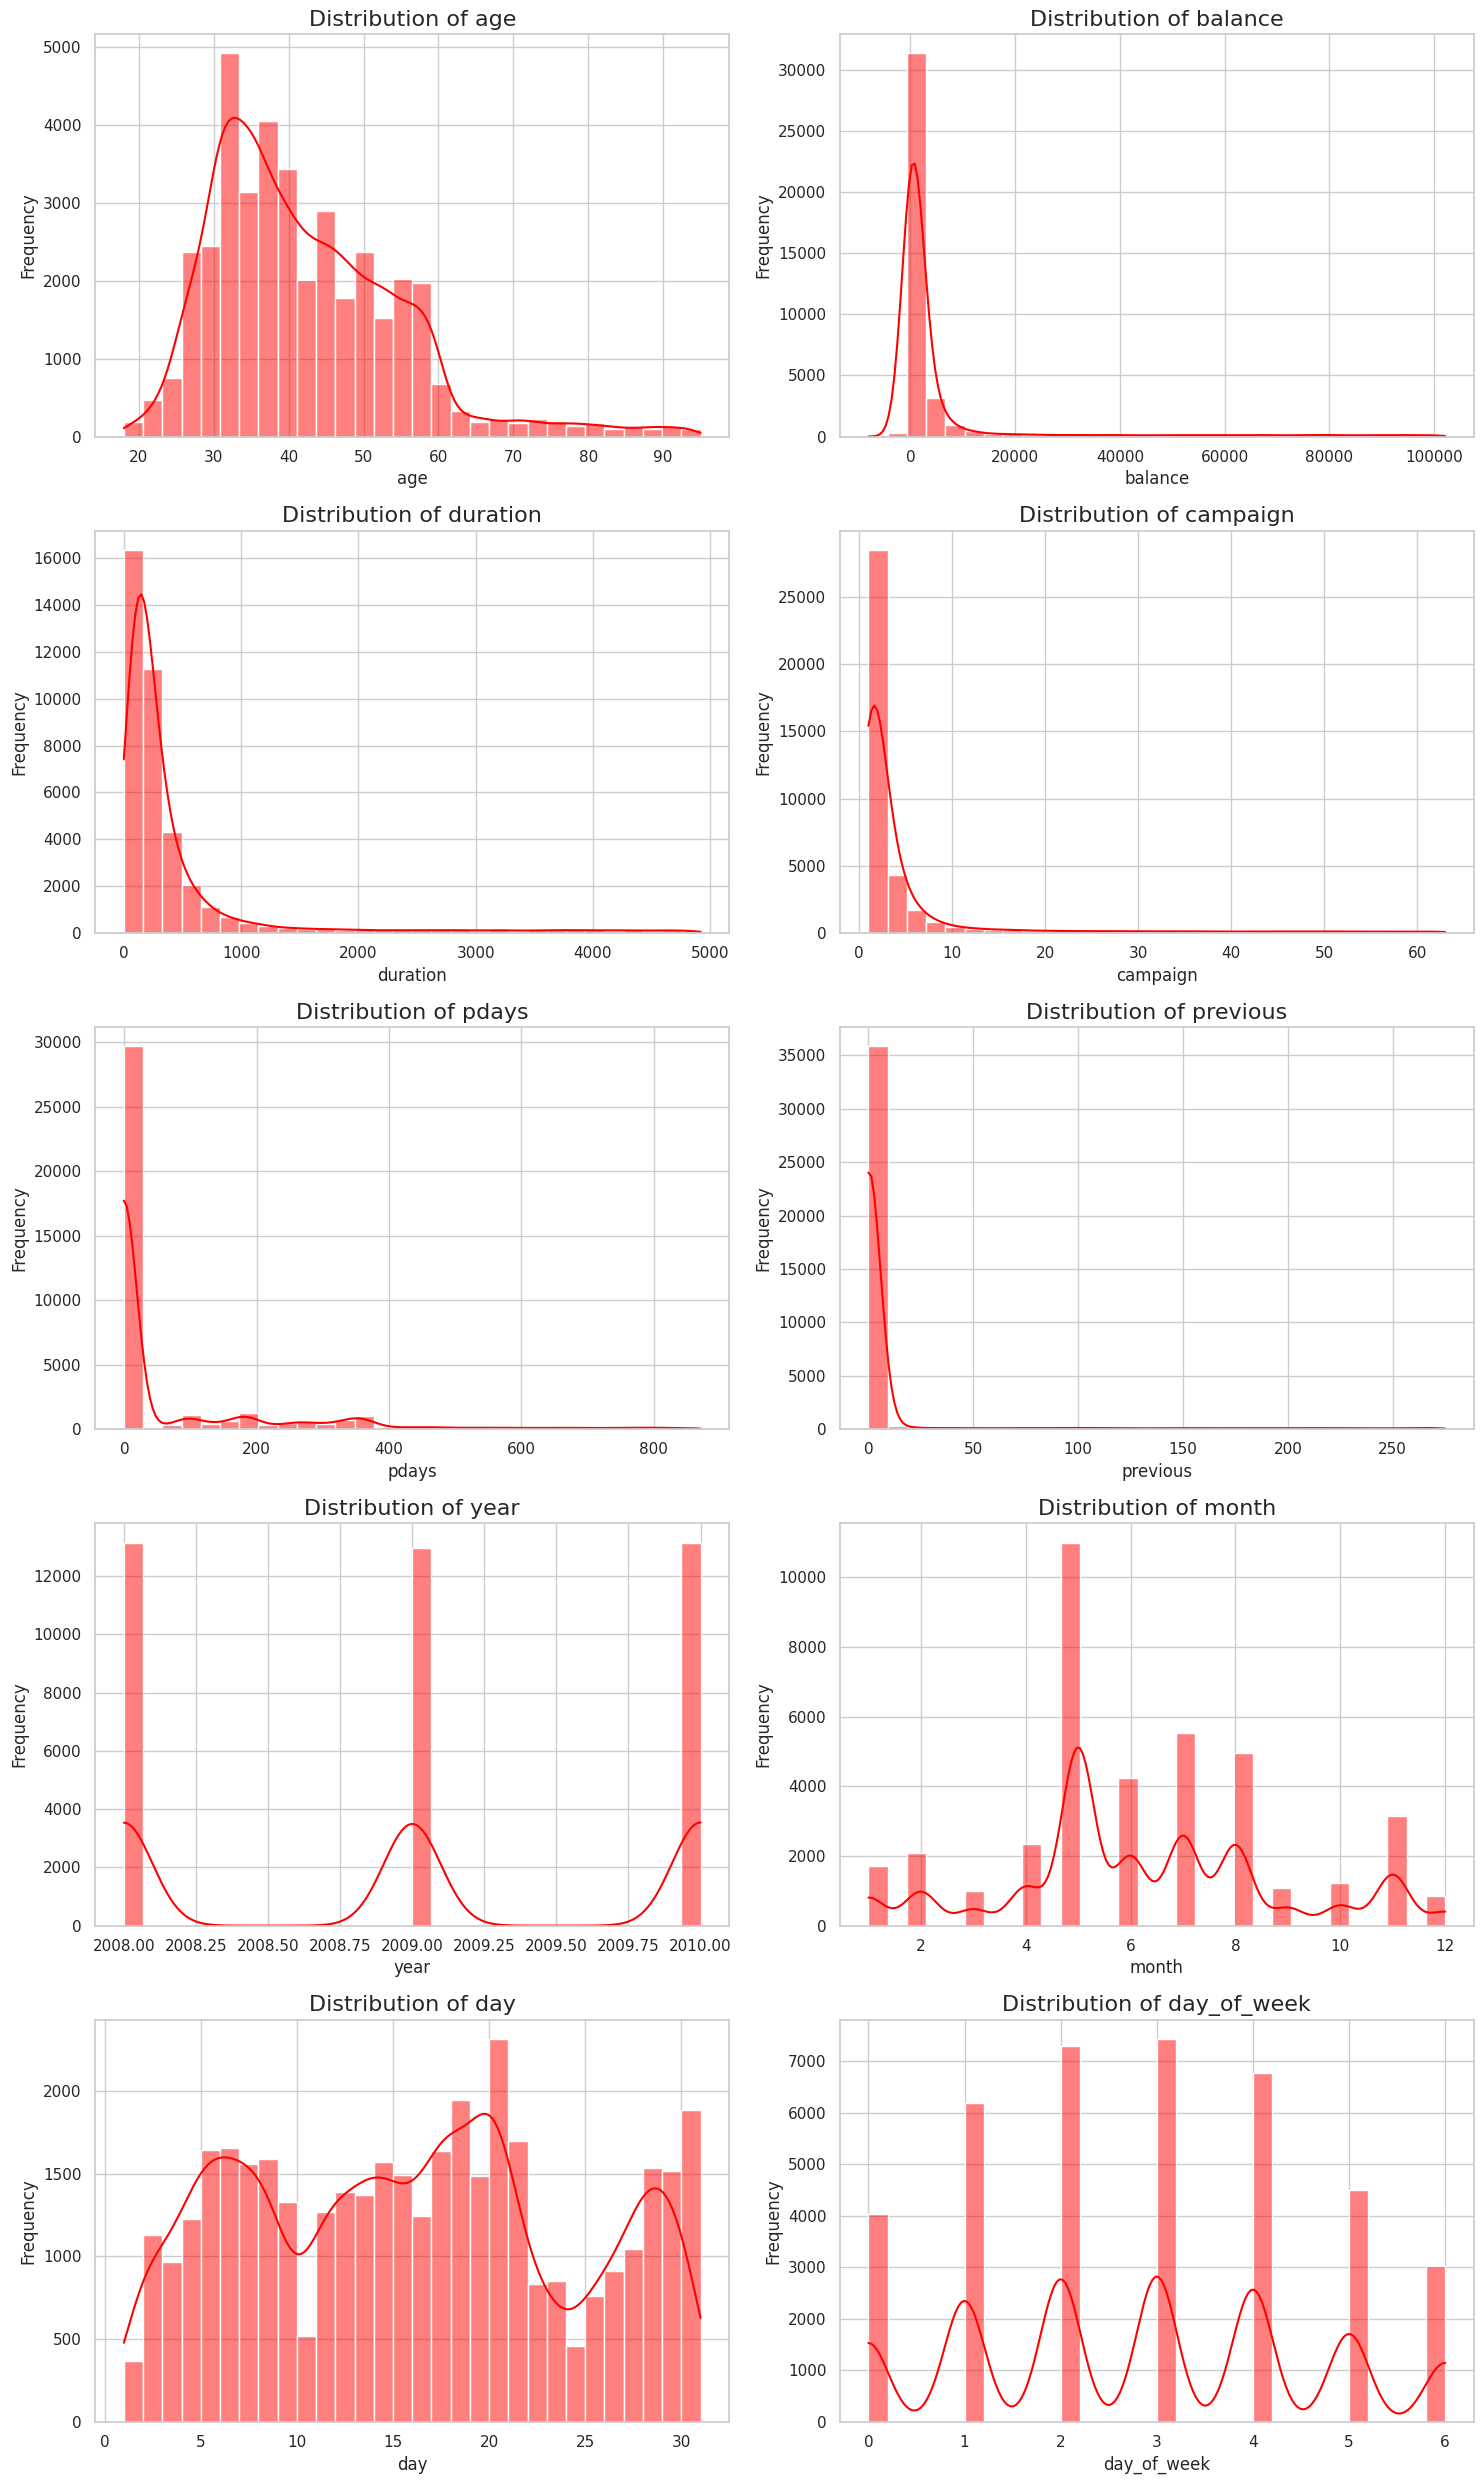

In [23]:
sns.set(style="whitegrid")

n_cols = 2  
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(X_train[col], kde=True, color='red', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Observations from histogram of Numerical Columns
* The distribution of Age is mostly Normal but with Right-Skewed Distribution (Positively Skewed) as it has longer right-tail
* The distribution of balance, duration, campaign, pdays, previous is Right Skewed Distribution as it has very long right-tail
* The distribution of year is balanced for all three years which are 2008,2009,2010.
* There is peak in May month compare to other months and March and December are the lowest compare to other months
* 1st, 10th and 24th have lowest compare to other days of month and 20th has highest. More or less the distribution is almost uniform over all the days
* For days, Wednesday is highest followed by tuesday and thrusday and days of week follows normal distribution

### Step-2.4.2 Count plots of Categorical Columns
* For understanding of distribution of Categorical Columns using Count plots.

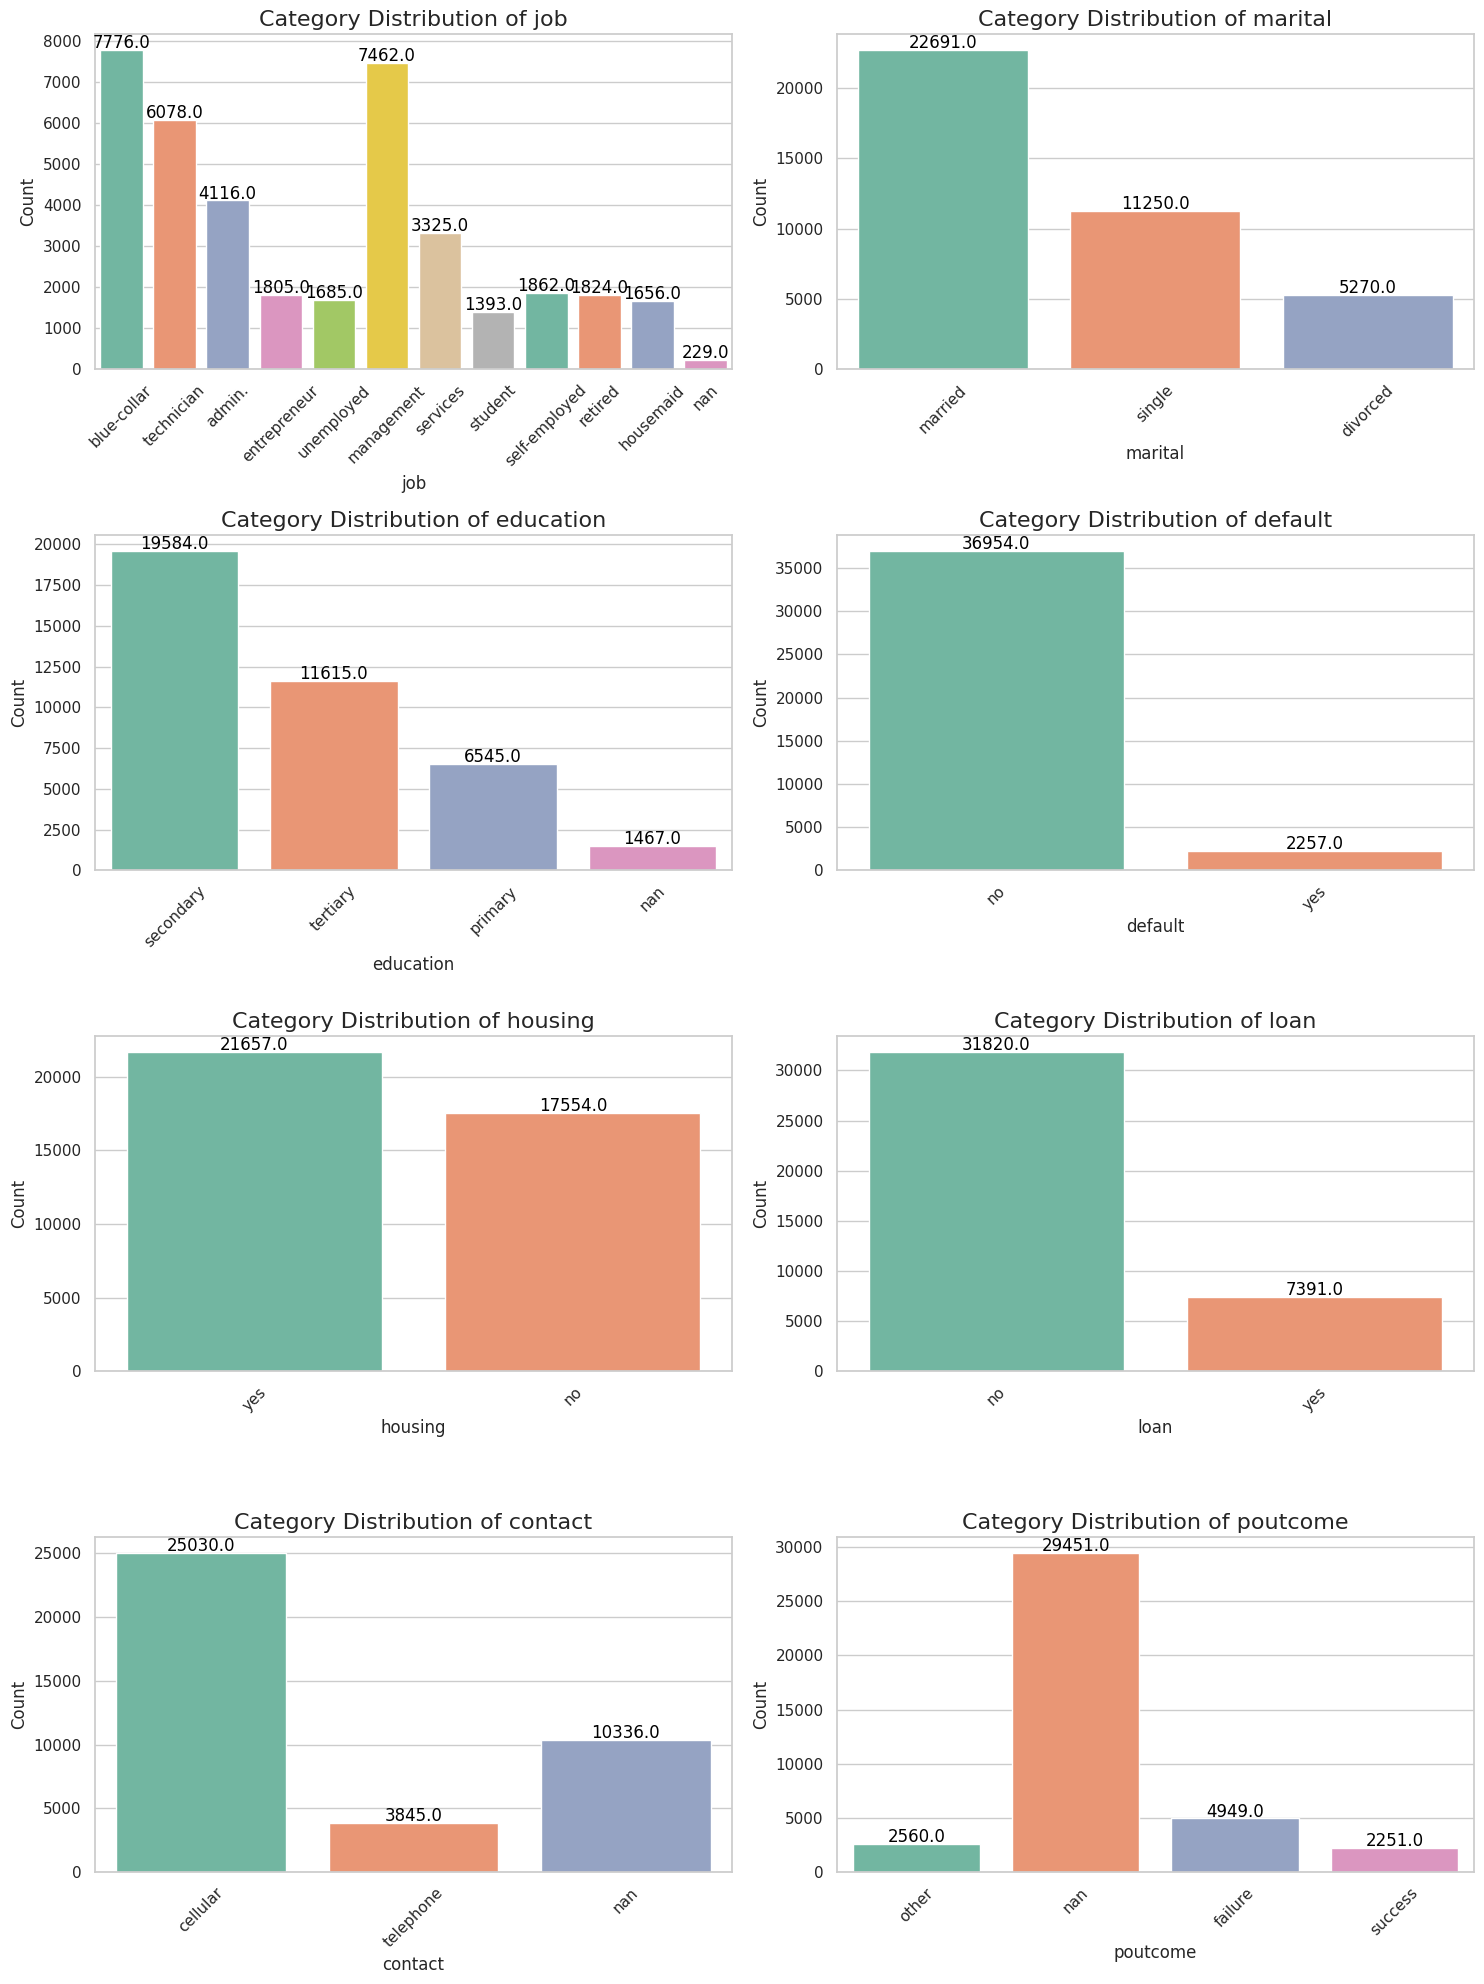

In [24]:
sns.set(style="whitegrid")
n_rows = (len(categorical_columns) // n_cols) + (len(categorical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()
if len(categorical_columns) == 1:
    axes = [axes]
for i, col in enumerate(categorical_columns):
    sns.countplot(x=X_train[col], palette='Set2', ax=axes[i])
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         fontsize=12, color='black', 
                         xytext=(0, 5), textcoords='offset points')
    
    axes[i].set_title(f'Category Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


###  Observations from Count plots of Categorical Columns
* The category distribution in job column follows kind of skewed distribution as it has majority of blue-color job category followed by management job category followed by technician. almost 3/4th of rows are covered for these categories only and other 8 categories contain only 1/4th rows.
* The category distribution of maritial also follows skewed distribution as it contains amlost 65% as married category only and other remaining 35% are covered in single and divorced category.
* The category distribution of also follows similar trend as maritial it has almost 65-70% for secondary category and remaining are tertiary and primary caegory.
* The category distribution of default is totally skewed as it has more than 85% has No-credit-default and 15% are credit-default.
* The category distribution of the housing is almost balanced between no-house-loan and has house-loan.
* The category distribution of loan also is skewed as it contains more than 85% on No-peronal-loan and remaining on personal-loan
* The category distribution of contact is also skewed as it has more than 90% contacted on cellular and remaining on telephone
* So almost all the categorical columns follows skewed distribution except housing.

### Step-2.4.3 Correlation between all numerical columns including target target variable 

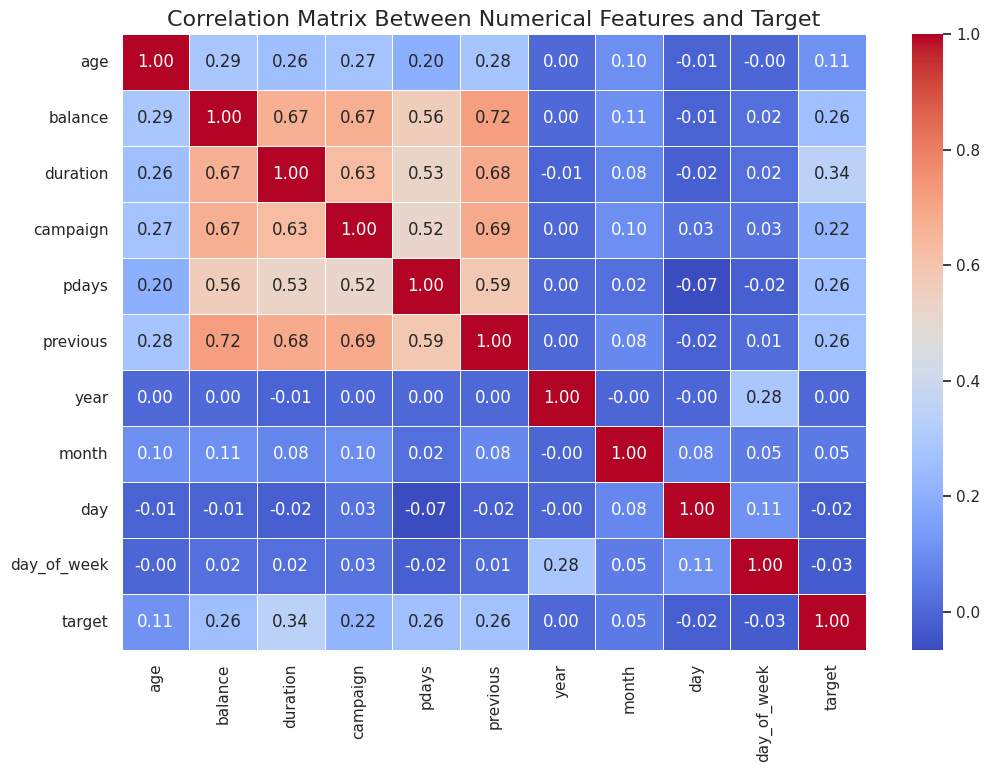

In [25]:
X_train_with_target_num = X_train[numerical_columns].copy()  
X_train_with_target_num['target'] = y_train_encoded  

correlation_matrix = X_train_with_target_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Numerical Features and Target', fontsize=16)
plt.show()


### Observations from heatmap of correlation between numerical columns including target column 
* Age has very weak correlation with all other columns including target column
* Default has somewhere moderate positive correlation with Balance, Duration, Campaign, Pdays, Previous columns and very weak correlation with other columns
* Balance has moderate positive correlation with Age, Default,Target and strong positive correlation with Duration, Campaign, Pdays, Previous and weak correaltion with other columns.
* Housing has very weak negative correaltion with all the other columns
* Loan has very weak positive correlation with all the other columns
* Duration has strong positive correlation with Age, Default, Balance, Loan, Campaign, Pdays, Previous and Target column
* Campaign has strong positive correlation with Age, Default, Balance, Loan, Duration, Pdays, Previous and Target column
* Pdays has strong positive correlation with Age, Default, Balance,  Duration, Campaign, Previous and Target column
* Previous has strong positive correlation with Age, Default, Balance,  Duration, Campaign, Pdays and Target column
* Year has no correlation with other columns except day_of_week which has positive correlation
* Month has very low positive correlation with other columns
* Day has very low negative correlation with other columns
* day_of_week has no correlation with other columns except Year which has positive correlation
* Target has weak negative correlation with housing and weak positive correlation with Age, Default, Balance, Duration, Campaign, Previous, Pdays.

### Step-2.4.4 Chi-Square test for all categorical columns
* It determines the significance of each categorical feature concerning the target.

#### Step-2.4.4.1 Selection and Conversion of all Categorical Columns for chi-square test

In [26]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [27]:
X_train_with_target_cat = X_train[categorical_columns].copy()  
X_train_with_target_cat['target'] = y_train_encoded 

categorical_cols = X_train_with_target_cat.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_train_with_target_cat[col] = label_encoders[col].fit_transform(X_train_with_target_cat[col])


#### Step-2.4.4.2 Performing chi-square test

In [28]:
chi2_results = {}
for col in categorical_cols:
    chi2_stat, p_value = chi2(X_train_with_target_cat[col].values.reshape(-1, 1), y_train_encoded)
    chi2_results[col] = p_value[0] 

chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['P-Value'])

chi2_df.sort_values(by='P-Value', ascending=True, inplace=True)
chi2_df['P-Value'] = chi2_df['P-Value'].apply(lambda x: f'{x:.10f}')

print(chi2_df)

                P-Value
default    0.0000000000
poutcome   0.0000000000
job        0.0000000000
housing    0.0000000000
education  0.0000249322
loan       0.0000912531
contact    0.0406197746
marital    0.1636100174


### Observations from chi-square test
* default & poutcome has Strong evidence of a significant association with the target variable as it has p-value 0.00
* contact has Strong evidence of a significant association with the target variable as it has p-value 0.00
* job has Strong evidence of a significant association with the target variable as it has p-value 0.00
* housing has Strong evidence of a significant association with the target variable as it has p-value 0.00
* education	has Significant association with the target variable as it has p-value 0.0000003957
* loan has Significant association with the target variable, though weaker than others as it has p-value 0.0000912531
* marital has No significant association with the target variable (p-value > 0.05) as it has p-value 0.1636100174

### Step-2.4.5 Outlier Detection

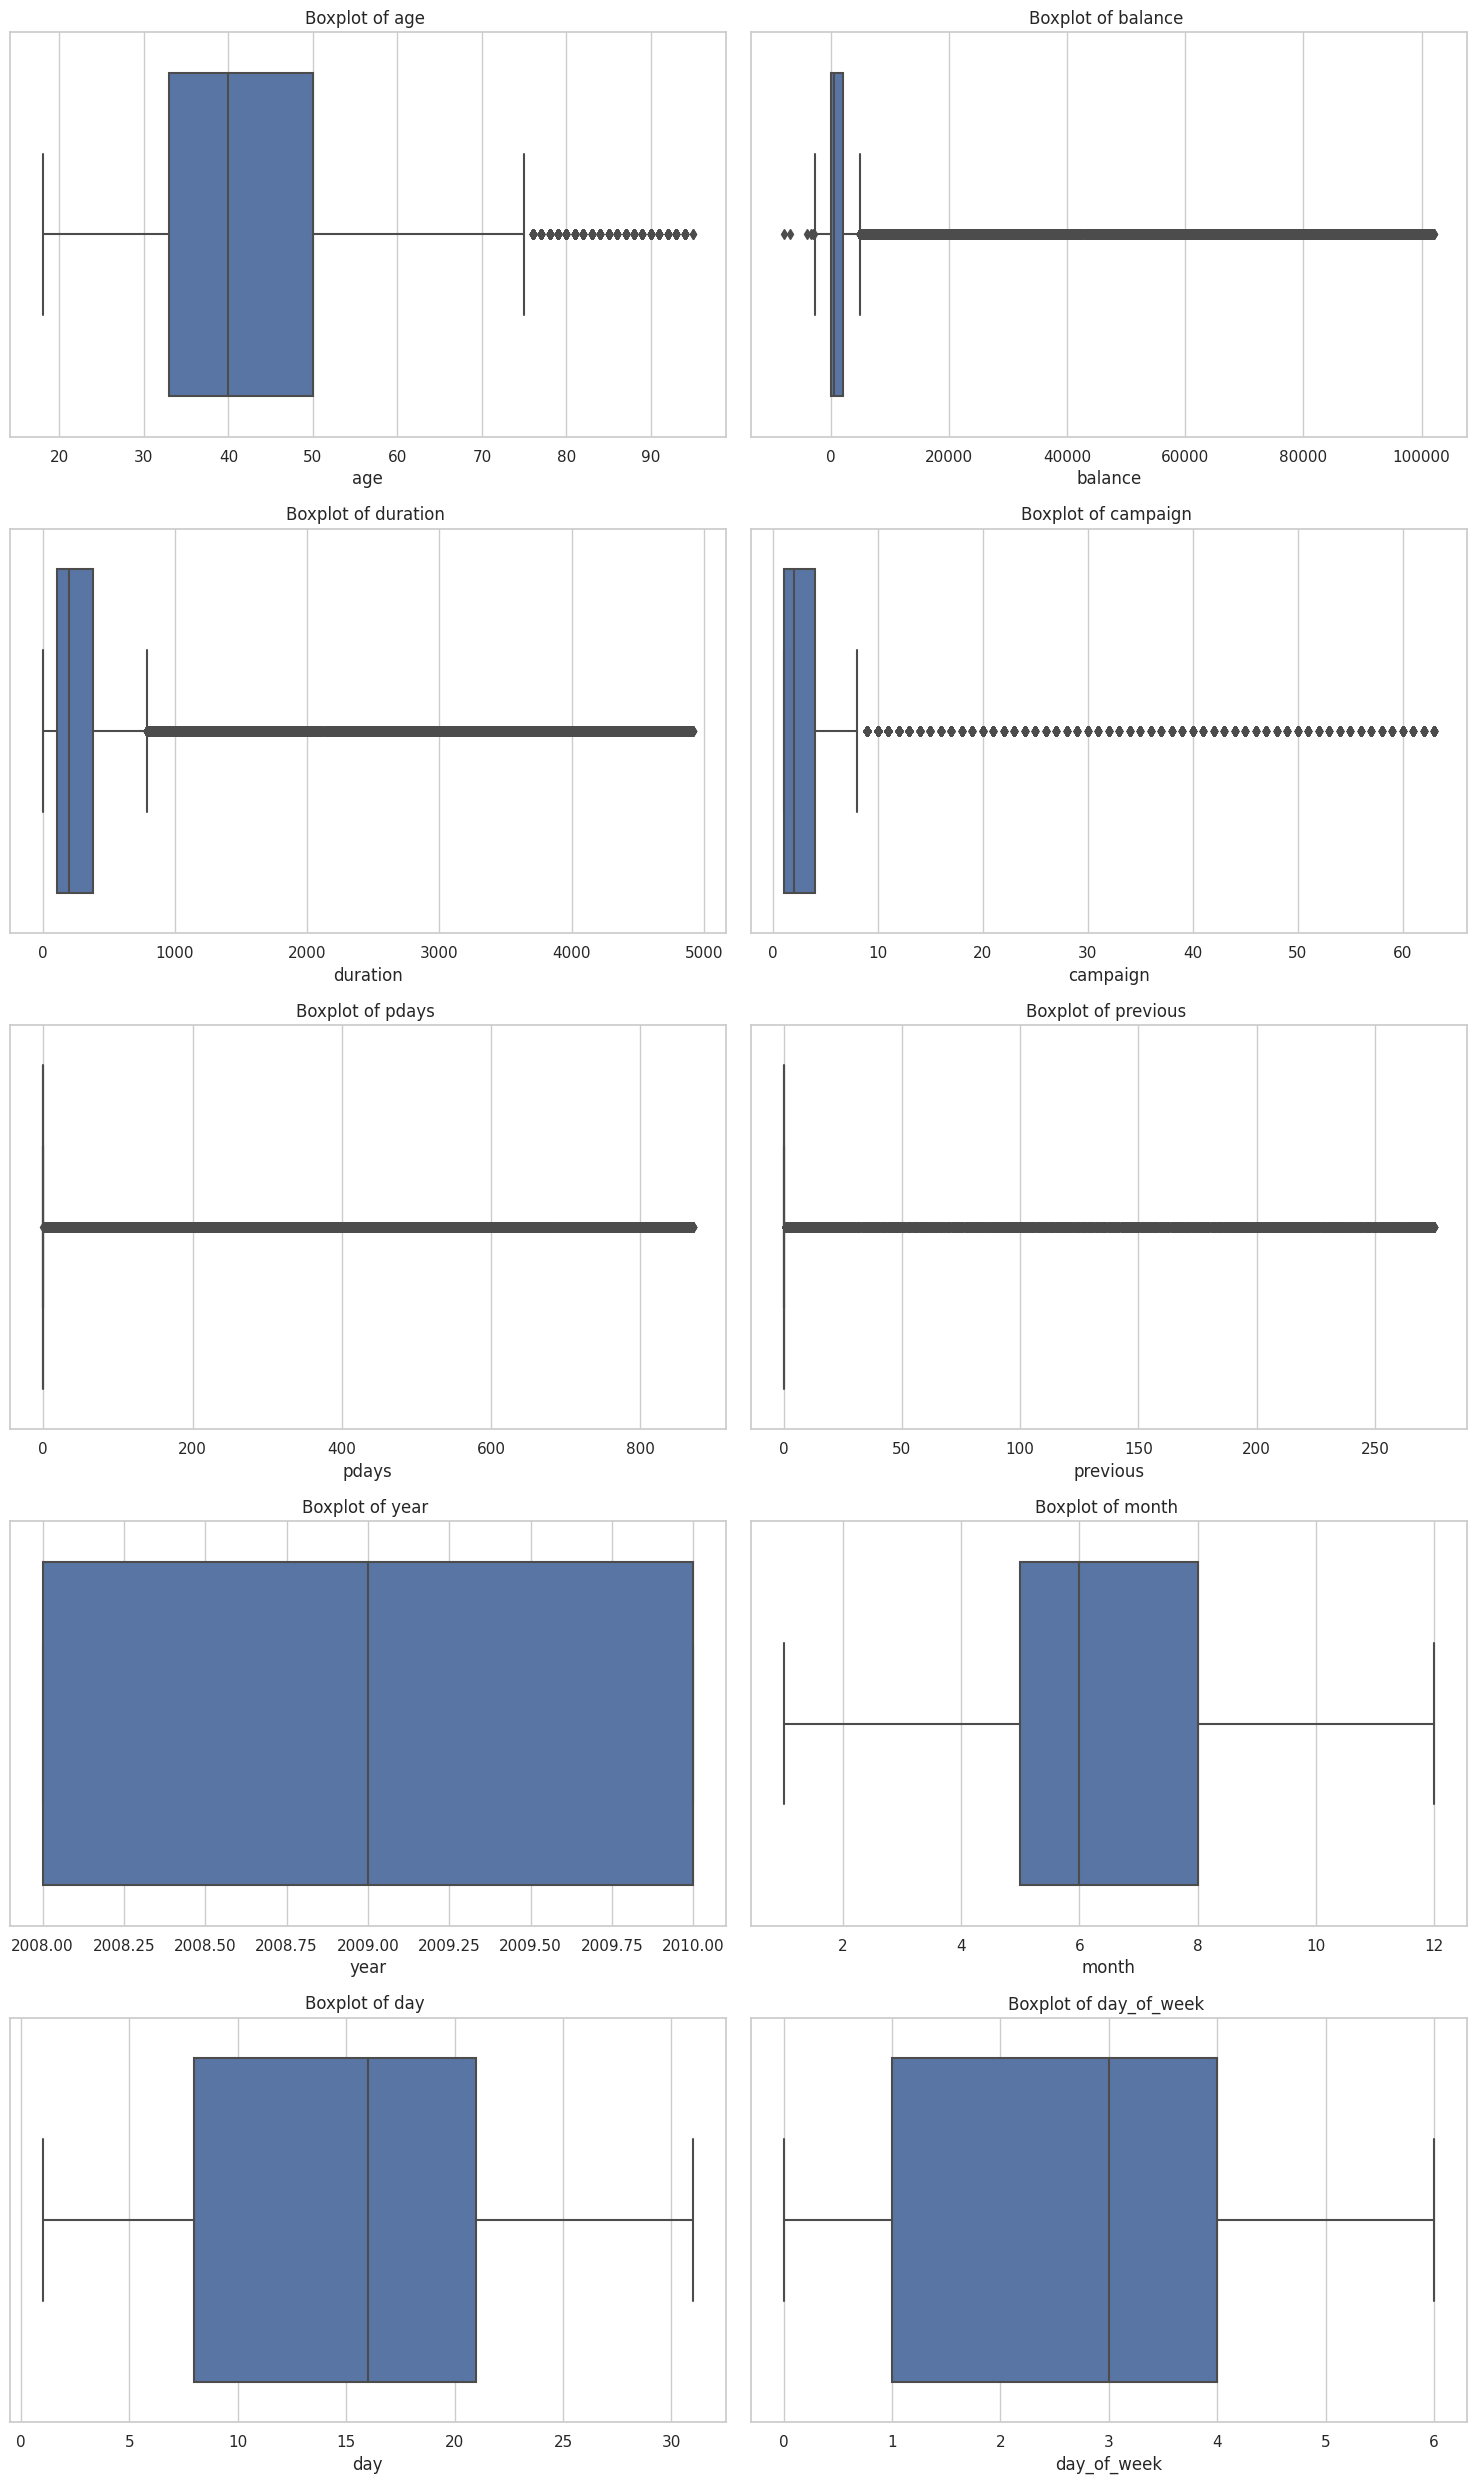

In [29]:
n_cols = 2 
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=col, data=X_train_with_target_num, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} ', fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Observations from Outlier Detection
* Year, Month, Day, Day_of_week has no Outliers
* Age, Balance, Duration, Campagin is Right Skewed and has outliers
* Pdays & Previous has maximum value as outliers 

### Step-2.4.6 PairPlot Analysis 

In [30]:
# sns.pairplot(X_train_with_target_num, hue='target', palette='viridis')
# plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
# plt.show()

### Observation from Pairplot Analysis
* The pair plot displays pairwise relationships among the features in dataset. Each variable is plotted against every other variable, allowing us to identify potential correlations, distributions, and patterns. Let's go through the observations systematically:

1. Diagonal Elements (Histograms/KDE Plots):
   * These show the distribution of individual features.
   * Age: The distribution is right-skewed, indicating a higher frequency of younger clients with a gradual decline in older clients.
   * Balance: Highly right-skewed, with most clients having a lower balance, but some extreme values (outliers) suggest a few clients with significantly higher balances.
   * Duration: Right-skewed, showing that most call durations are short, with a few long calls.
   * Campaign: Mostly clustered around low numbers, suggesting that the majority of clients were contacted only a few times.
   * Pdays: Shows a significant number of -1 values, indicating many clients have never been contacted before the current campaign.
   * Previous: Heavily right-skewed, with most clients having no previous contact, but a few clients have been contacted multiple times.
   * Month: Indicates a concentration of contacts in certain months (e.g., May and August) with fewer contacts in others.
   * Day_of_week: Some days have more contacts than others, which could indicate operational preferences or scheduling strategies.

2. Correlations:
   * Age vs. Balance: There is no clear linear correlation visible between age and balance. However, the density increases in specific regions, suggesting clusters.
   * Duration vs. Target: The duration of contact appears to have some separation between the target classes (1 for success and 0 for no success). Longer call durations are more likely associated with a positive outcome (target = 1).
   * Pdays and Previous: There’s no clear linear pattern, but most values are centered around low counts or -1, indicating no prior contacts. These features might need further treatment or transformation.
   * Campaign vs. Duration: There is a higher concentration of shorter durations even when the number of campaigns increases, suggesting that most follow-up contacts are also short.

3. Class Separation (Target):
   * The target variable is represented using two colors (e.g., blue for target=0 and green for target=1).
   * Duration stands out as a strong differentiator between the two classes. Longer call durations are associated with a higher likelihood of success (target=1).
   * Age, Balance, and Pdays show some clusters, but no strong separation between target=0 and target=1.

4. Outliers:
   * Several features like balance, duration, campaign, and previous contain outliers. These could be influencing the model if not treated correctly.
   * The presence of extreme outliers in balance suggests that feature engineering (e.g., capping or transformation) may be necessary.

5. Categorical Variables:
   * Month and Day_of_week: These variables show repeating patterns due to their cyclical nature. For example, the distribution of contacts across months and days could reflect operational timings or campaign strategies.
   * The day_of_week seems uniformly distributed, indicating no strong bias towards contacting clients on specific days of the week.


## Step-2.5 Observations from EDA
1. 1. Target Variable (Class Imbalance)
   * The target variable shows a significant class imbalance, with approximately 85% of records labeled as "No" and around 15% as "Yes"
     
2. Handling Missing Values
   * poutcome Column: Having about 75% missing values.
   * contact, education, job Column: Imputed with KNNImputer with k=5.
     
3. Distribution of Numerical Columns
   * Age: Mostly follows a normal distribution but is slightly right-skewed.
   * Balance, Duration, Campaign, Pdays, Previous: All show right-skewed distributions.
   * Year, Month, Day, Day_of_week: More balanced distributions with specific peaks in certain months/days.

4. Distribution of Categorical Columns
   * Highly Skewed: job, marital, education, default, loan, and contact columns show significant skewness in their category distributions.
   * Balanced: Only the housing column appears to have a balanced distribution.

Correlation Analysis (Heatmap)

5. Strong Positive Correlations:
   * Notable between columns like Duration, Campaign, Pdays, Previous, and the target.
   * Weak Correlations: Age, Housing, Loan, Month, Day, Day_of_week generally have weak correlations with other columns and the target.
   * Negative Correlation: The housing column shows a weak negative correlation with the target.

6. Chi-Square Test (Categorical vs. Target Association)
   * Significant associations with the target variable were found for columns like default, contact, job, housing, education, and loan.
   * No significant association for the marital column.
     
7. Outlier Detection
   * Outliers are present in columns like Age, Balance, Duration, Campaign, Pdays, and Previous.
   * No outliers were found in Year, Month, Day, and Day_of_week.

## Step-2.6 Preprocessing of Features
* Using OneHotEncoder converting all categorical columns into Numerical Columns.
* Using StandardScaling scaling all the Numericalcolumns 

In [31]:
X_train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
year           0
month          0
day            0
day_of_week    0
dtype: int64

In [32]:
X_train.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          39211 non-null  int64 
 1   job          39211 non-null  object
 2   marital      39211 non-null  object
 3   education    39211 non-null  object
 4   default      39211 non-null  object
 5   balance      39211 non-null  int64 
 6   housing      39211 non-null  object
 7   loan         39211 non-null  object
 8   contact      39211 non-null  object
 9   duration     39211 non-null  int64 
 10  campaign     39211 non-null  int64 
 11  pdays        39211 non-null  int64 
 12  previous     39211 non-null  int64 
 13  poutcome     39211 non-null  object
 14  year         39211 non-null  int32 
 15  month        39211 non-null  int32 
 16  day          39211 non-null  int32 
 17  day_of_week  39211 non-null  int32 
dtypes: int32(4), int64(6), object(8)
memory usage: 4.8+ MB
<class 'pan

(None, None)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [34]:
#Categorical Encoder for categorical columns
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

#Standard Scalar for Numerical columns
# numerical_preprocessor = StandardScaler()
numerical_preprocessor = MinMaxScaler()

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [35]:
# Fit and transform the training data
X_train_prep = pipeline.fit_transform(X_train)

# Transform the test data
X_test_prep = pipeline.transform(X_test)

# Convert to DataFrame for easier handling
X_train_encoded = pd.DataFrame(X_train_prep, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_prep, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# Display the transformed training data
print("Transformed Training Data:")
print(X_train_encoded.head())

Transformed Training Data:
   num__age  num__balance  num__duration  num__campaign  num__pdays  \
0  0.103896      0.078677       0.072590       0.016129    0.380734   
1  0.441558      0.077824       0.032534       0.000000    0.000000   
2  0.337662      0.085487       0.066287       0.000000    0.000000   
3  0.194805      0.076380       0.021147       0.032258    0.000000   
4  0.168831      0.074047       0.090484       0.016129    0.000000   

   num__previous  num__year  num__month  num__day  num__day_of_week  ...  \
0       0.003636        0.5    0.272727  0.533333          0.666667  ...   
1       0.000000        0.5    0.818182  0.333333          1.000000  ...   
2       0.000000        1.0    0.909091  0.633333          0.833333  ...   
3       0.000000        0.5    0.727273  0.000000          0.166667  ...   
4       0.000000        0.0    0.000000  0.933333          0.166667  ...   

   cat__housing_yes  cat__loan_no  cat__loan_yes  cat__contact_cellular  \
0             

In [36]:
X_train_encoded.info(),X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num__age                  39211 non-null  float64
 1   num__balance              39211 non-null  float64
 2   num__duration             39211 non-null  float64
 3   num__campaign             39211 non-null  float64
 4   num__pdays                39211 non-null  float64
 5   num__previous             39211 non-null  float64
 6   num__year                 39211 non-null  float64
 7   num__month                39211 non-null  float64
 8   num__day                  39211 non-null  float64
 9   num__day_of_week          39211 non-null  float64
 10  cat__job_admin.           39211 non-null  float64
 11  cat__job_blue-collar      39211 non-null  float64
 12  cat__job_entrepreneur     39211 non-null  float64
 13  cat__job_housemaid        39211 non-null  float64
 14  cat__j

(None, None)

* After this step all the columns are in float64 type and all categorical columns are converted in numerical columns and all numerical columns are scaled.

# Step-3 Model Training & Validation

## Step-3.1 Train and Validation Split from Train Dataset & SMOTE processing 

In [37]:
from sklearn.model_selection import train_test_split

X_train_part, X_val_part, y_train_part, y_val_part=train_test_split(X_train_encoded, y_train_encoded, test_size=0.2, random_state=42, shuffle=True)

## Step-3.2 Decision Tree Model With SMOTE(Over Sampling)

In [38]:
from imblearn.over_sampling import SMOTE  

# Step 1: Initialize SMOTE for oversampling
# SMOTE (Synthetic Minority Oversampling Technique) generates synthetic examples for the minority class
# to balance the class distribution in the training dataset.
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data part of train dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_part, y_train_part)

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Step 2: Decision Tree Classifier 
# - max_depth: Limits the depth of the tree to prevent overfitting.
# - min_samples_split: Minimum samples required to split a node.
# - min_samples_leaf: Minimum samples required in a leaf node.
# - max_features: Maximum number of features considered for splits.
# - random_state: Ensures reproducibility.
dt_smote = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=50,
    max_features=30,
    random_state=100,
)

In [40]:
# Step 3: Train the Decision Tree model on the resampled smote dataset
dt_smote.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=6, max_features=30, min_samples_leaf=50,
                       min_samples_split=5, random_state=100)

In [41]:
# Step 3: Visualize the Decision Tree
plt.figure(figsize=(200, 100))  
plot_tree(
    dt_smote, 
    feature_names=X_train_part.columns, 
    class_names=dt_smote.classes_.astype(str),  
    filled=True,  
    rounded=True, 
    fontsize=10 
)
plt.title("Decision Tree Visualization")
plt.show()

In [42]:
# Step 4: Make predictions on the validation dataset
# Use the trained Decision Tree model to predict labels for the validation set.
y_pred_smote = dt_smote.predict(X_val_part)
y_pred_prob_dt = dt_smote.predict_proba(X_val_part)[:, 1]

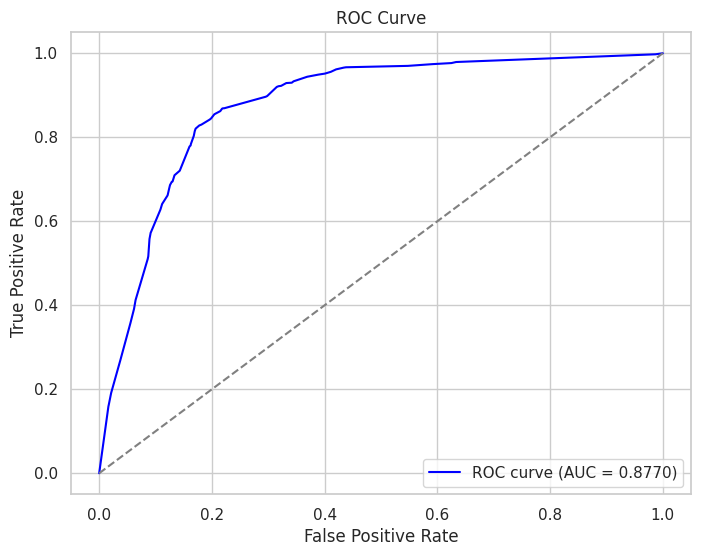

F1 score (Validation): 0.7380937488856743
F1 score (Training): 0.7370916276358995
ROC-AUC Score: 0.8770
Precision: 0.4567
Recall: 0.8280


In [43]:
# Step 5: F1 score for the validation dataset
# - F1 score is a harmonic mean of precision and recall.
# - The "macro" average calculates the metric independently for each class and averages the scores.
f1_smote = f1_score(y_val_part, y_pred_smote, average="macro")

# Step 6: F1 score for the training dataset 
# This checks how well the model performs on the training data.
f1_train_smote = f1_score(y_train_encoded, dt_smote.predict(X_train_encoded), average="macro")

# Step 7: Other metrics for validation dataset
roc_auc = roc_auc_score(y_val_part, y_pred_prob_dt)

fpr, tpr, thresholds = roc_curve(y_val_part, y_pred_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision = precision_score(y_val_part, y_pred_smote)
recall = recall_score(y_val_part, y_pred_smote)

print("F1 score (Validation):", f1_smote)
print("F1 score (Training):", f1_train_smote)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



In [44]:
# Step 6: Predictions on the test dataset (X_test)
y_pred_dt_smote = dt_smote.predict(X_test_encoded)

## Step-3.3 XGBoost Model Using SMOTE(Over Sampling)

In [45]:
from xgboost import XGBClassifier 

# Step 1: Initialize the XGBoost Classifier
# - random_state: Ensures reproducibility.
# - colsample_bytree: Fraction of features considered for splitting at each tree node.
# - gamma: Minimum loss reduction required to make a split.
# - learning_rate: Shrinks feature weights after each boosting step (controls learning rate).
# - max_depth: Maximum depth of a tree, controls model complexity.
# - n_estimators: Number of trees in the model (number of boosting rounds).
# - subsample: Fraction of samples used to train each tree.
# - eval_metric: Evaluation metric used for validation during training.
xgb = XGBClassifier(
    random_state=42,
    colsample_bytree=0.90,
    gamma=10,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.7,
    eval_metric='logloss',
)

In [46]:
# Step 2: Train the XGBoost Classifier
# - `fit` trains the model using the resampled training data (balanced using SMOTE or other techniques).
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=10, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
# Step 3: Predictions on the Validation Set
# - `predict` generates predicted labels for the validation set.
y_pred_val = xgb.predict(X_val_part)
y_prob_val_xgb = xgb.predict_proba(X_val_part)[:, 1]


--- Final XGBoost Classifier Evaluation ---
F1 Score (macro): 0.7593
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6645
           1       0.53      0.71      0.60      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.80      0.76      7843
weighted avg       0.88      0.86      0.87      7843

Confusion Matrix:
[[5886  759]
 [ 350  848]]
F1-score on training data: 0.7617


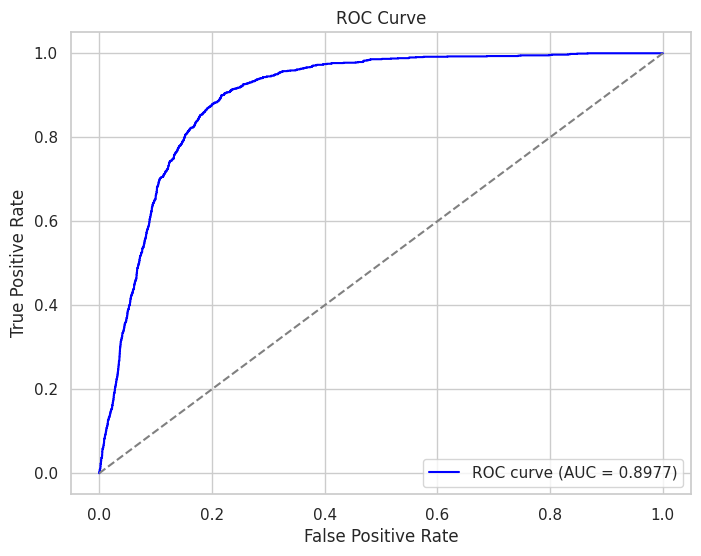

F1 score (Validation): 0.7380937488856743
F1 score (Training): 0.7370916276358995
ROC-AUC Score: 0.8977
Precision: 0.4567
Recall: 0.8280


In [48]:
# Step 4: Evaluate the model performance
print("\n--- Final XGBoost Classifier Evaluation ---")

# - f1_score: The F1-score (macro) is calculated to evaluate the performance of the model. 
#   It gives equal weight to all classes and is useful when we have an imbalanced dataset.
print(f"F1 Score (macro): {f1_score(y_val_part, y_pred_val, average='macro'):.4f}")  # Display the F1-score

# - classification_report: This provides precision, recall, and F1-score for each class in the validation set. 
#   It gives a more detailed evaluation of the model's performance across different classes.
print("Classification Report:")
print(classification_report(y_val_part, y_pred_val))  # Display classification report

# - confusion_matrix: This matrix shows true positives, false positives, true negatives, and false negatives. 
#   It is useful for understanding where the model is making mistakes.
print("Confusion Matrix:")
print(confusion_matrix(y_val_part, y_pred_val))  # Display confusion matrix

# Step 5: Predictions on the training set to evaluate the model’s performance on training data
# - We are using the model to predict the target variable for the training set (X_train_encoded).
X_train_pred_xgb = xgb.predict(X_train_encoded)  # Predicting labels for the training set

# - f1_score: Calculate the F1-score on the training data to check for overfitting. 
#   If the training F1 score is much higher than the validation F1 score, it may indicate overfitting.
f1_voting = f1_score(y_train_encoded, X_train_pred_xgb, average='macro')  # Calculate F1-score on the training set

print(f"F1-score on training data: {f1_voting:.4f}")  

# Step 7: Other metrics for validation dataset
roc_auc = roc_auc_score(y_val_part, y_prob_val_xgb)

fpr, tpr, thresholds = roc_curve(y_val_part, y_prob_val_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision = precision_score(y_val_part, y_pred_smote)
recall = recall_score(y_val_part, y_pred_smote)

print("F1 score (Validation):", f1_smote)
print("F1 score (Training):", f1_train_smote)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

In [49]:
# Step 6: Make predictions on the test dataset (X_test)
y_pred_xgb=xgb.predict(X_test_encoded)

## Step-3.4 Random Forest Model Using SMOTE(Over Sampling) and Hyperparameter Tuning using GridSearchCV

In [50]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier  # For Random Forest model
# from sklearn.metrics import f1_score, classification_report, confusion_matrix  
# from sklearn.model_selection import GridSearchCV  

# # Step 1: Parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree. 
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
#     'class_weight': ['balanced', 'balanced_subsample']  # Class weight strategies to handle class imbalance. 
# }

# # Step 2: RandomForestClassifier 
# rf_clf = RandomForestClassifier(random_state=42)

# # Step 3: GridSearchCV to find the best hyperparameters for the Random Forest
# grid_search = GridSearchCV(
#     estimator=rf_clf,
#     param_grid=param_grid,  
#     scoring='f1_macro',  
#     cv=5,  
#     n_jobs=-1,  
#     verbose=1 
# )

# # Step 4: Fit the GridSearchCV to the training data
# grid_search.fit(X_train_part, y_train_part)

# # Step 5: Best model and hyperparameters from the grid search
# best_rf = grid_search.best_estimator_ 
# print("Best Hyperparameters:", grid_search.best_params_)

# # Step 6: Predictions on the validation set using the best model
# y_pred_rf = best_rf.predict(X_val_part)

# # Step 7:Model's performance using F1-score (macro average)
# f1_rf = f1_score(y_val_part, y_pred_rf, average='macro') 
# print(f"Best Random Forest F1-score (macro): {f1_rf:.4f}")

# print("\nClassification Report:\n", classification_report(y_val_part, y_pred_rf))

# print("\nConfusion Matrix:\n", confusion_matrix(y_val_part, y_pred_rf))


# Output:
# Fitting 5 folds for each of 216 candidates, totaling 1080 fits
# Best Random Forest F1-score (macro): 0.7653
# Best Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

# Classification Report:
#               precision    recall  f1-score   support
#
#           0       0.95      0.87      0.91      6645
#           1       0.52      0.76      0.62      1198
#
#     accuracy                           0.86      7843
#    macro avg       0.74      0.82      0.77      7843
# weighted avg       0.89      0.86      0.87      7843


# Confusion Matrix:
#  [[5811  834]
#  [ 288  910]]


## Step-3.5 Random Forest Model with SMOTE(Over Sampling)
* Highest Percentage f1_score

In [51]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import f1_score, classification_report, confusion_matrix 

# Step 1: Random Forest Classifier
# - n_estimators: Number of trees in the forest. 
# - max_depth: Controls the maximum depth of each tree.
# - min_samples_split: The minimum number of samples required to split an internal node. A
# - min_samples_leaf: The minimum number of samples required to be at a leaf node. 
# - random_state: Ensures reproducibility of results.
# - class_weight: 'balanced_subsample' automatically adjusts weights inversely proportional to class frequencies to handle imbalanced data.

rf_clf = RandomForestClassifier(
    n_estimators=300,          
    max_depth=None,            
    min_samples_split=2,       
    min_samples_leaf=4,          
    random_state=42,            
    class_weight='balanced_subsample'  
)

In [52]:
# Step 2:  Train the Random Forest Classifier 
# Fit the Random Forest model on the training data
rf_clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=4,
                       n_estimators=300, random_state=42)

In [53]:
# Step 3: Predictions on the Validation Set
y_pred_rf = rf_clf.predict(X_val_part) 
y_prob_val_rf = rf_clf.predict_proba(X_val_part)[:, 1]


--- Final Random Forest Evaluation ---
F1 Score (macro): 0.7706
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      6645
           1       0.54      0.75      0.63      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.82      0.77      7843
weighted avg       0.89      0.86      0.87      7843

Confusion Matrix:
[[5870  775]
 [ 301  897]]
F1-score on training data: 0.8727


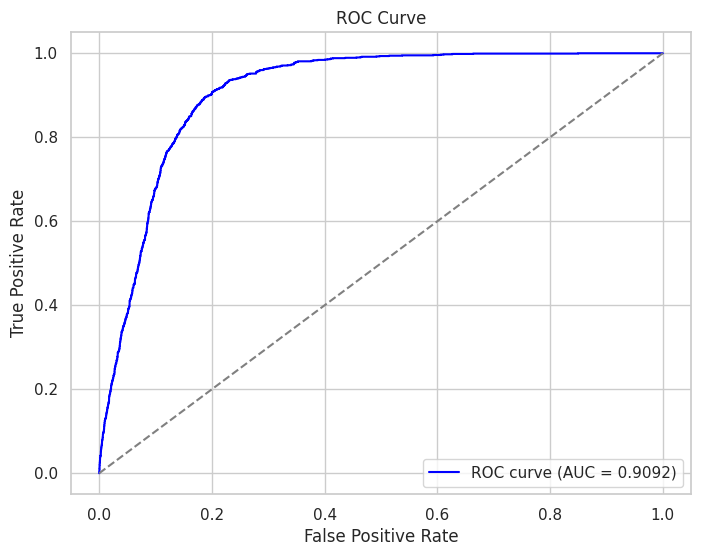

F1 score (Validation): 0.7380937488856743
F1 score (Training): 0.7370916276358995
ROC-AUC Score: 0.9092
Precision: 0.4567
Recall: 0.8280


In [54]:
# Step 4: Evaluate the model performance
print("\n--- Final Random Forest Evaluation ---")

# - f1_score: The F1-score (macro) is calculated to evaluate the performance of the model. 
#   It gives equal weight to all classes and is useful when we have an imbalanced dataset.
print(f"F1 Score (macro): {f1_score(y_val_part, y_pred_rf, average='macro'):.4f}")  # Display the F1-score

# - classification_report: This provides precision, recall, and F1-score for each class in the validation set. 
#   It gives a more detailed evaluation of the model's performance across different classes.
print("Classification Report:")
print(classification_report(y_val_part, y_pred_rf)) 

# - confusion_matrix: This matrix shows true positives, false positives, true negatives, and false negatives. 
#   It is useful for understanding where the model is making mistakes.
print("Confusion Matrix:")
print(confusion_matrix(y_val_part, y_pred_rf))

# Step 5: Make predictions on the training set to evaluate the model’s performance on training data
X_train_pred_rf = rf_clf.predict(X_train_encoded)  

# - f1_score: Calculate the F1-score on the training data to check for overfitting. 
f1_voting = f1_score(y_train_encoded, X_train_pred_rf, average='macro')  
print(f"F1-score on training data: {f1_voting:.4f}")  

# Step 7: Other metrics for validation dataset
roc_auc = roc_auc_score(y_val_part, y_prob_val_rf)

fpr, tpr, thresholds = roc_curve(y_val_part, y_prob_val_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision = precision_score(y_val_part, y_pred_smote)
recall = recall_score(y_val_part, y_pred_smote)

print("F1 score (Validation):", f1_smote)
print("F1 score (Training):", f1_train_smote)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


#### Fitting model with whole dataset including validation dataset 

In [55]:
# Apply SMOTE to the whole training data
X_train_full_resampled, y_train_full_resampled = smote.fit_resample(X_train_encoded, y_train_encoded)
rf_clf.fit(X_train_full_resampled, y_train_full_resampled)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=4,
                       n_estimators=300, random_state=42)

In [56]:
# Step 6: Make predictions on the test dataset (X_test)
y_test_pred_rf = rf_clf.predict(X_test_encoded)

## Step-3.6 Light Gradient Boosting Model with SMOTE(Over Sampling)

In [57]:
from lightgbm import LGBMClassifier 
from sklearn.metrics import f1_score, classification_report, confusion_matrix 

# Step 1: LightGBM Classifier
# - boosting_type: 'dart' prevents overfitting by randomly dropping trees during training.
# - colsample_bytree: Fraction of features to consider for each tree. 
# - learning_rate: Controls how much each tree contributes to the final prediction (lower values make the model more robust).
# - n_estimators: Number of boosting iterations (trees) to build.
# - num_leaves: Maximum number of leaves in one tree.
# - subsample: Fraction of the data used for fitting each tree. 
# - random_state: Ensures reproducibility by setting a fixed seed for random operations.
# - n_jobs: The number of parallel threads used during training.
# - verbose: Controls the verbosity of the output during training.

# lgbm_clf = LGBMClassifier(
#     colsample_bytree=0.8,        
#     learning_rate=0.01,           
#     n_estimators=400,            
#     num_leaves=61,                
#     subsample=0.8,                
#     random_state=42,             
#     n_jobs=-1,                  
#     verbose=-1                     
# )
lgbm_clf = LGBMClassifier(
    boosting_type='dart',
    colsample_bytree=0.8,        
    learning_rate=0.01,           
    n_estimators=500,            
    num_leaves=141,                
    subsample=0.8,                
    random_state=42,             
    n_jobs=-1,                  
    verbose=-1                     
)

In [58]:
# Step 2: Train the LightGBM model on the resampled training data
lgbm_clf.fit(X_train_resampled, y_train_resampled)  

LGBMClassifier(boosting_type='dart', colsample_bytree=0.8, learning_rate=0.01,
               n_estimators=500, n_jobs=-1, num_leaves=141, random_state=42,
               subsample=0.8, verbose=-1)

In [59]:
# Step 3: Make predictions on the validation set
y_pred_final = lgbm_clf.predict(X_val_part)  
y_prob_val_lgbm = lgbm_clf.predict_proba(X_val_part)[:, 1]


--- Final LGBM Evaluation ---
F1 Score (macro): 0.7813
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6645
           1       0.55      0.79      0.64      1198

    accuracy                           0.87      7843
   macro avg       0.75      0.83      0.78      7843
weighted avg       0.90      0.87      0.88      7843

Confusion Matrix:
[[5860  785]
 [ 256  942]]
F1-score on training data: 0.7907


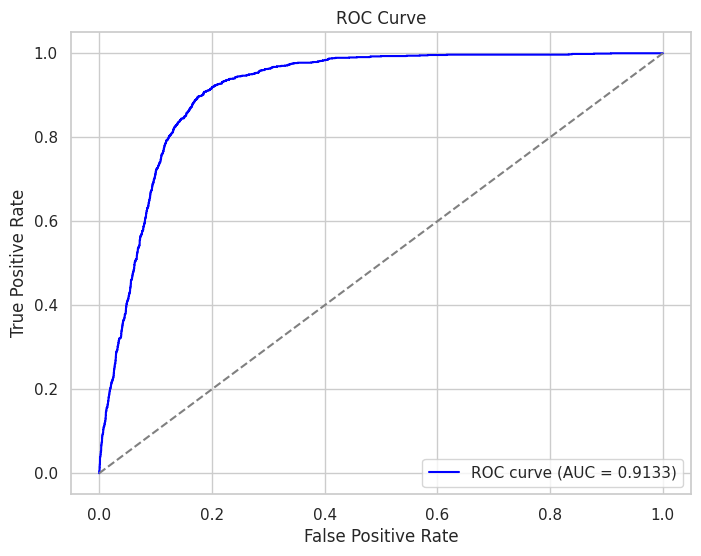

F1 score (Validation): 0.7380937488856743
F1 score (Training): 0.7370916276358995
ROC-AUC Score: 0.9133
Precision: 0.4567
Recall: 0.8280


In [60]:
# Step 4: Evaluate the model performance
print("\n--- Final LGBM Evaluation ---")

# - f1_score: The F1-score (macro) is calculated to evaluate the performance of the model. 
#   It gives equal weight to all classes and is useful when we have an imbalanced dataset.
print(f"F1 Score (macro): {f1_score(y_val_part, y_pred_final, average='macro'):.4f}") 

# - classification_report: This provides precision, recall, and F1-score for each class in the validation set. 
#   It gives a more detailed evaluation of the model's performance across different classes.
print("Classification Report:")
print(classification_report(y_val_part, y_pred_final)) 

# - confusion_matrix: This matrix shows true positives, false positives, true negatives, and false negatives. 
#   It is useful for understanding where the model is making mistakes.
print("Confusion Matrix:")
print(confusion_matrix(y_val_part, y_pred_final)) 

# Step 5: Make predictions on the training set to evaluate the model’s performance on training data
# - We are using the model to predict the target variable for the training set (X_train_encoded).
X_train_pred_lgbm = lgbm_clf.predict(X_train_encoded) 

# - f1_score: Calculate the F1-score on the training data to check for overfitting. 
#   If the training F1 score is much higher than the validation F1 score, it may indicate overfitting.
f1_voting = f1_score(y_train_encoded, X_train_pred_lgbm, average='macro') 
print(f"F1-score on training data: {f1_voting:.4f}")  


# Step 7: Other metrics for validation dataset
roc_auc = roc_auc_score(y_val_part, y_prob_val_lgbm)

fpr, tpr, thresholds = roc_curve(y_val_part, y_prob_val_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision = precision_score(y_val_part, y_pred_smote)
recall = recall_score(y_val_part, y_pred_smote)

print("F1 score (Validation):", f1_smote)
print("F1 score (Training):", f1_train_smote)

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

In [61]:
# Step 6: Make predictions on the test dataset (X_test)
y_test_pred_lgbm = lgbm_clf.predict(X_test_encoded)

## Step-3.7 Voting Classifier Model using (XGBoost, Light Gradient Boosting, CatBoost) with SMOTE(Over Sampling)

In [63]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Step 1: Define and configure base models
# XGBoost Classifier
# - scale_pos_weight: Balances the classes by assigning higher weight to minority class.
# - n_estimators: Number of boosting rounds (trees).
# - max_depth: Maximum depth of a tree.
# - learning_rate: Controls the contribution of each tree to the final prediction.
# - random_state: Ensures reproducibility.

xgb_clf = XGBClassifier(
    scale_pos_weight=5,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# LightGBM Classifier
# - is_unbalance: Handles class imbalance automatically.
# - n_estimators: Number of boosting rounds (trees).
# - max_depth: Maximum depth of a tree.
# - learning_rate: Controls the contribution of each tree to the final prediction.
# - random_state: Ensures reproducibility.

lgbm_clf = LGBMClassifier(
    is_unbalance=True,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)

# CatBoost Classifier
# - auto_class_weights: Automatically balances class weights.
# - iterations: Number of boosting rounds (trees).
# - depth: Maximum depth of a tree.
# - learning_rate: Controls the contribution of each tree to the final prediction.
# - random_state: Ensures reproducibility.

cat_clf = CatBoostClassifier(
    auto_class_weights="Balanced",
    iterations=100,
    depth=6,
    learning_rate=0.1,
    verbose=0,
    random_state=42
)

# Step 2: Voting Classifier
# - voting: 'soft' indicates that predicted probabilities are averaged.
# - weights: Defines the contribution of each model to the final prediction.
# - n_jobs: Runs training in parallel for improved efficiency.

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgbm', lgbm_clf),
        ('cat', cat_clf),
    ],
    voting='soft',
    weights=[2, 5, 3],
    n_jobs=-1
)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26739, number of negative: 26739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10296
[LightGBM] [Info] Number of data points in the train set: 53478, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Validation F1 Macro Score: 0.7756
Classification Report:
              precision    recall  f1-score   sup

In [ ]:
# Step 3: Fit the VotingClassifier on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Step 4: Make predictions on the validation set
y_pred_val = voting_clf.predict(X_val_part)

In [ ]:
# Step 5: Evaluate model performance
print("\n--- Voting Classifier Evaluation ---")

# - f1_score: Evaluates the macro F1 score on the validation set.
print(f"Validation F1 Macro Score: {f1_score(y_val_part, y_pred_val, average='macro'):.4f}")

# - classification_report: Provides precision, recall, and F1-score for each class.
print("Classification Report:")
print(classification_report(y_val_part, y_pred_val))

# - confusion_matrix: Displays true positives, false positives, true negatives, and false negatives.
print("Confusion Matrix:")
print(confusion_matrix(y_val_part, y_pred_val))

# Step-4 Model Prediction and submission file creation

In [65]:
# mapped_values = np.where(y_pred_dt_smote == 0, 'no', 'yes')
# mapped_values = np.where(y_pred_xgb == 0, 'no', 'yes')
# mapped_values = np.where(y_test_pred_rf == 0, 'no', 'yes')
mapped_values = np.where(y_test_pred_lgbm == 0, 'no', 'yes')
print(mapped_values.shape)

(10000,)


In [66]:
submission = pd.DataFrame({"id" : range(0, 10000), 
                          "target" :mapped_values })
submission.to_csv('submission.csv', index=False) 
submission

id target
0        0     no
1        1     no
2        2     no
3        3     no
4        4    yes
...    ...    ...
9995  9995     no
9996  9996    yes
9997  9997    yes
9998  9998    yes
9999  9999     no

[10000 rows x 2 columns]

# Step-5 Project Summary and Conclusion

## Step-5.1 Project Summary

This project involves building and evaluating machine learning models to predict a target variable, with a focus on maximizing the F1-macro score due to class imbalance. The process includes data preprocessing, exploratory data analysis (EDA), feature scaling, imputation strategies, and model experimentation. Below is a summary of the key steps and findings:

***Exploratory Data Analysis (EDA) observations:***

1. **Target Variable (Class Imbalance)**
   * The target variable shows a significant class imbalance, with approximately 85% of records labeled as "No" and around 15% as "Yes"
     
2. **Handling Missing Values**
   * poutcome Column: Having about 75% missing values.
   * contact, education, job, poutcome Column: Imputed with KNNImputer with k=5.
     
3. **Distribution of Numerical Columns**
   * Age: Mostly follows a normal distribution but is slightly right-skewed.
   * Balance, Duration, Campaign, Pdays, Previous: All show right-skewed distributions.
   * Year, Month, Day, Day_of_week: More balanced distributions with specific peaks in certain months/days.

4. **Distribution of Categorical Columns**
   * Highly Skewed: job, marital, education, default, loan, and contact columns show significant skewness in their category distributions.
   * Balanced: Only the housing column appears to have a balanced distribution.

5. **Correlation Analysis (Heatmap)**
   * Strong Positive Correlations: Notable between columns like Duration, Campaign, Pdays, Previous, and the target.
   * Weak Correlations: Age, Housing, Loan, Month, Day, Day_of_week generally have weak correlations with other columns and the target.
   * Negative Correlation: The housing column shows a weak negative correlation with the target.

6. **Chi-Square Test (Categorical vs. Target Association)**
   * Significant associations with the target variable were found for columns like default, contact, job, housing, education, and loan.
   * No significant association for the marital column.
     
7. **Outlier Detection**
   * Outliers are present in columns like Age, Balance, Duration, Campaign, Pdays, and Previous.
   * No outliers were found in Year, Month, Day, and Day_of_week.
  
     
**Data Preprocessing****

1. **Imputation Techniques:**
   * Implemented KNNImputer (k=5) and SimpleImputer(strategy="most_frequent") for handling missing data.
   * KNNImputer produced better results than SimpleImputer.
     
2. **Feature Scaling:**
   * Compared StandardScaler and MinMaxScaler for normalizing features.
   * MinMaxScaler performed better, likely due to the presence of outliers and varying feature distributions.
     
3. **Oversampling:**
   * Used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset, improving model performance on minority classes.


**Model Experimentation****

Several models were implemented and evaluated using F1-macro, precision, recall. The key findings are as follows:

1. **LightGBM (with DART boosting)**
    * Best-performing model in terms of F1-macro score.
Configured with:
        * boosting_type='dart'
        * colsample_bytree=0.8,
        * learning_rate=0.01,
        * n_estimators=500,
        * num_leaves=141,
        * subsample=0.8
    * Achieved the highest F1-macro score across all models, outperforming others in handling class imbalance effectively.
      
2. **Voting Classifier**
   * Combined XGBoost, LightGBM, and CatBoost with optimized weights (2, 5, 3).
   * Utilized soft voting to average predicted probabilities.
   * Provided competitive results but fell short compared to standalone LightGBM (DART).
     
3. **XGBoost**
   * Performed well with:
        * colsample_bytree=0.9,
        * gamma=10,
        * learning_rate=0.1,
        * max_depth=3,
        * n_estimators=100,
        * subsample=0.7
    * Strong precision and recall but lower F1-macro compared to LightGBM.
      
4. **Random Forest**
    * Used GridSearchCV for hyperparameter optimization, tuning parameters like:
    * n_estimators, max_depth, min_samples_split, min_samples_leaf
class_weight='balanced_subsample'
    * Achieved moderate performance, indicating limited ability to handle class imbalance without SMOTE.
      
5. **Decision Tree**
    * Simplified model with limited performance.
    * Highlighted the need for ensemble methods for this dataset.


**Key Findings****

1. **Best Model:**
   * LightGBM with DART boosting achieved the highest F1-macro score.
     
2. **Feature Imputation:**
   * KNNImputer performed better than SimpleImputer, improving data quality.
     
3. **Feature Scaling:**
   * MinMaxScaler outperformed StandardScaler, especially with models sensitive to feature scaling.
     
4. **EDA Insights:**
   * Identified critical features and relationships through visualization and statistical tests, leading to better model design.
     
5. **Model Ensemble:**
   * While ensembles like VotingClassifier provided competitive results, they did not outperform the standalone LightGBM.
     
6. **Evaluation Metrics:**
   * F1-Macro: Focused on due to the imbalanced dataset.
   * Precision and Recall: Evaluated to understand the trade-off between false positives and false negatives.

## Step-5.2 Conclusion

The project successfully implemented a robust machine learning pipeline. Through extensive experimentation and feature engineering, **LightGBM with DART boosting emerged as the optimal model, achieving the best F1-macro score**. The project highlights the importance of data preprocessing, imputation, scaling, and model selection in addressing imbalanced datasets.